
*Bitcoin price fluctuation, unlike stocks or bonds, is not tied to any tangible thing. What is the driving force?*

**We are predicting the fluctuation of the bitcoin market based on sentiment analysis of social media messages.**

In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import requests

> "Bitcoin burns a whole country's worth of electricity (Norway) for the most inefficient payment network in human history"
> - David Gerard (Cryptocurrency researcher and writer)

## Historic Bitcoin Prices

### API

In [3]:
# Due to size limit of API request, process needs to be split in two for out current time-frame
# NOTE: originally we had an overlap, causing duplicates, which was solved with a correct API dating
first_url = "https://api.coindesk.com/v1/bpi/historical/close.json?start=2018-01-01&end=2020-09-26"
first_batch = requests.get(first_url).json()
second_url = "https://api.coindesk.com/v1/bpi/historical/close.json?start=2020-09-27&end=2021-03-01"
second_batch = requests.get(second_url).json()

In [6]:
first_df = pd.DataFrame.from_dict(first_batch["bpi"], orient='index')
second_df = pd.DataFrame.from_dict(second_batch["bpi"], orient='index')
#vertical_stack = pd.concat([first_df, second_df], axis=0)
#vertical_stack.head()
first_df.head()

,0
2018-01-01,13412.4400
2018-01-02,14740.7563
2018-01-03,15134.6513
2018-01-04,15155.2263
2018-01-05,16937.1738


In [7]:
first_df.reset_index(level=0, inplace=True)
first_df.head()

,index,0
0,2018-01-01,13412.4400
1,2018-01-02,14740.7563
2,2018-01-03,15134.6513
3,2018-01-04,15155.2263
4,2018-01-05,16937.1738


In [9]:
first_df.columns=['ds','y']
first_df

,ds,y
0,2018-01-01,13412.4400
1,2018-01-02,14740.7563
2,2018-01-03,15134.6513
3,2018-01-04,15155.2263
4,2018-01-05,16937.1738
...,...,...
995,2020-09-22,10531.1646
996,2020-09-23,10260.0330
997,2020-09-24,10672.9568
998,2020-09-25,10729.0696


In [14]:
first_df.dtypes

ds     object
y     float64
dtype: object

In [132]:
vertical_stack.drop_duplicates().shape

(1156, 1)

<AxesSubplot:>

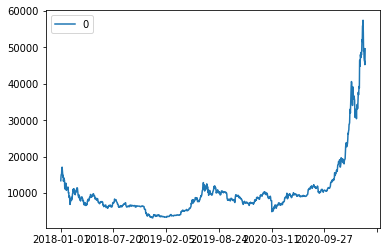

In [134]:
vertical_stack.plot()

Date has been set to match dates of Fear & Greed index, but we are considering extending them

In [135]:
# Export to CSV for other teamates to use
# vertical_stack.to_csv("../data/bitcoinprice_fixed.csv")

### Kaggle

In [71]:
kaggle_data = pd.read_csv('../raw_data/coin_Bitcoin.csv')
kaggle_data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [72]:
# It seems that the Fear & Greed index already takes into account market Volume
# Therefore to avoid colinearity we might have to drop it but we will keep it for now

In [73]:
kaggle_df = kaggle_data.drop(columns=['SNo','Name','Symbol'])

In [75]:
# Dates here have seconds, which we want to get rid of for potential merging
Dates = []
for i in range(kaggle_df.shape[0]):
    Dates.append(kaggle_df['Date'][i][0:10])

kaggle_df['Date'] = Dates

In [76]:
kaggle_df['Date'] = pd.to_datetime(kaggle_df['Date'],format='%Y-%m-%d')
kaggle_df.dtypes

Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Marketcap           float64
dtype: object

In [77]:
kaggle_df = kaggle_df.rename(columns={"Date": "timestamp"})
kaggle_df = kaggle_df.set_index('timestamp')
kaggle_df

,High,Low,Open,Close,Volume,Marketcap
timestamp,,,,,,
2013-04-29,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
2013-04-30,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2013-05-01,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
2013-05-02,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
2013-05-03,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...
2021-02-23,54204.929756,45290.590268,54204.929756,48824.426869,1.061025e+11,9.099259e+11
2021-02-24,51290.136695,47213.498162,48835.087661,49705.333316,6.369552e+10,9.263931e+11
2021-02-25,51948.966982,47093.853019,49709.082425,47093.853019,5.450657e+10,8.777661e+11


In [85]:
kaggle_df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

<AxesSubplot:xlabel='timestamp'>

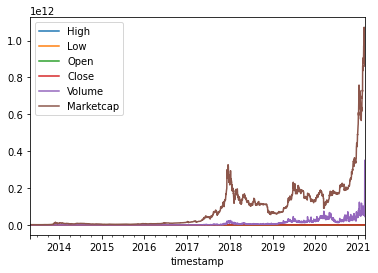

In [86]:
kaggle_df.plot()

<AxesSubplot:xlabel='timestamp'>

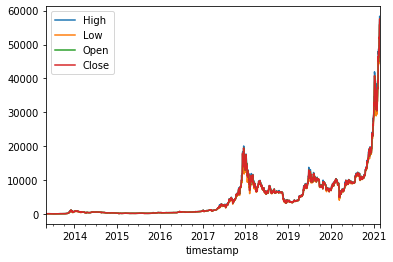

In [88]:
kaggle_df[['High','Low','Open','Close']].plot()

## Crypto-sentiment indexes

### Telegram Data

In [128]:
# Original plan was ditched due to unbalanced dataset

### Fear & Greed Index

In [2]:
url = 'https://api.alternative.me/fng/?limit=0'
params = {'date_format' : 'world'}
response = requests.get(url,params=params)
status_code = response.status_code
status_code

200

In [5]:
data = response.json()
clean_data = pd.DataFrame(data['data']).drop(columns=['value_classification','time_until_update'])
clean_data.head()

,value,timestamp
0,78,03-03-2021
1,78,02-03-2021
2,38,01-03-2021
3,55,28-02-2021
4,56,27-02-2021


In [16]:
clean_data['timestamp'] = pd.to_datetime(clean_data['timestamp'],format='%d-%m-%Y')
clean_data.columns = ['Fear&Greed', 'timestamp']
df = clean_data.set_index('timestamp')
df

,Fear&Greed
timestamp,
2021-03-03,78
2021-03-02,78
2021-03-01,38
2021-02-28,55
2021-02-27,56
...,...
2018-02-05,11
2018-02-04,24
2018-02-03,40


In [18]:
df.isnull().sum()

Fear&Greed    0
dtype: int64

<AxesSubplot:xlabel='timestamp'>

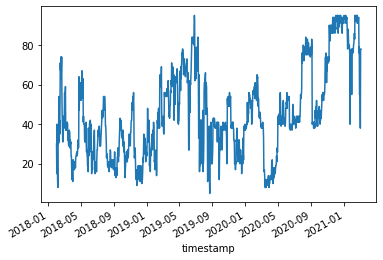

In [17]:
pd.to_numeric(df['Fear&Greed']).plot()

In [21]:
# Export to CSV for other teamates to use
# df.to_csv('../data/Fear_Greed_df.csv')

### Augmento index

In [8]:
# Getting topics Indexes:
topics_url = "http://api-dev.augmento.ai/v0.1/topics"
topics_index = requests.get(topics_url).json()

In [9]:
topics_url = "http://api-dev.augmento.ai/v0.1/topics"
topics_index = requests.get(topics_url).json()
topics_index

{'0': 'Hacks',
 '1': 'Pessimistic/Doubtful',
 '2': 'Banks',
 '3': 'Selling',
 '4': 'Market_manipulation',
 '5': '(De-)centralisation',
 '6': 'Angry',
 '7': 'ETF',
 '8': 'Leverage',
 '9': 'Bottom',
 '10': 'Institutional_money',
 '11': 'FOMO',
 '12': 'Prediction',
 '13': 'Adoption',
 '14': 'Fearful/Concerned',
 '15': 'Portfolio',
 '16': 'FUD_theme',
 '17': 'Whitepaper',
 '18': 'Announcements',
 '19': 'Technical_analysis',
 '20': 'Flippening',
 '21': 'Community',
 '22': 'Investing/Trading',
 '23': 'Euphoric/Excited',
 '24': 'Hodling',
 '25': 'ICO',
 '26': 'Bearish',
 '27': 'Going_short',
 '28': 'Uncertain',
 '29': 'Volume',
 '30': 'Risk',
 '31': 'Governance',
 '32': 'Ban',
 '33': 'Cheap',
 '34': 'Short_term_trading',
 '35': 'Fork',
 '36': 'Progress',
 '37': 'Shilling',
 '38': 'Bullish',
 '39': 'Happy',
 '40': 'Bubble',
 '41': 'Bots',
 '42': 'Hopeful',
 '43': 'Bug',
 '44': 'Open_source',
 '45': 'Token_economics',
 '46': 'Security',
 '47': 'Marketing',
 '48': 'Bad_news',
 '49': 'Due_diligen

#### Getting list of counts of topics per day for (BTC_talk, Twitter, and Reddit)

In [10]:
url_agg = "http://api-dev.augmento.ai/v0.1/events/aggregated"

params_BTC_1 = {
  "source" : "bitcointalk",
  "coin" : "bitcoin",
  "bin_size" : "24H",
  "count_ptr" : 1000,
  "start_ptr" : 0,
  "start_datetime" : "2018-02-01T00:00:00Z",
  "end_datetime" : "2020-04-30T00:00:00Z",
}
data_BTC_1 = requests.get(url_agg, params=params_BTC_1).json()
topics_count_BTC_1 = pd.DataFrame(data_BTC_1).drop(columns=['t_epoch'])
topics_count_BTC_1['datetime'] = pd.to_datetime(topics_count_BTC_1['datetime']).dt.date
topics_count_BTC_1 = topics_count_BTC_1.set_index('datetime')


params_BTC_2 = {
  "source" : "bitcointalk",
  "coin" : "bitcoin",
  "bin_size" : "24H",
  "count_ptr" : 500,
  "start_ptr" : 0,
  "start_datetime" : "2020-04-29T00:00:00Z",
  "end_datetime" : "2021-03-02T00:00:00Z",
}
data_BTC_2 = requests.get(url_agg, params=params_BTC_2).json()
topics_count_BTC_2 = pd.DataFrame(data_BTC_2).drop(columns=['t_epoch'])
topics_count_BTC_2['datetime'] = pd.to_datetime(topics_count_BTC_2['datetime']).dt.date
topics_count_BTC_2 = topics_count_BTC_2.set_index('datetime')

In [11]:
params_twitter_1 = {
  "source" : "twitter",
  "coin" : "bitcoin",
  "bin_size" : "24H",
  "count_ptr" : 1000,
  "start_ptr" : 0,
  "start_datetime" : "2018-02-01T00:00:00Z",
  "end_datetime" : "2020-04-30T00:00:00Z",
}
data_twitter_1 = requests.get(url_agg, params=params_twitter_1).json()
topics_count_twitter_1 = pd.DataFrame(data_twitter_1).drop(columns=['t_epoch'])
topics_count_twitter_1['datetime'] = pd.to_datetime(topics_count_twitter_1['datetime']).dt.date
topics_count_twitter_1 = topics_count_twitter_1.set_index('datetime')


params_twitter_2 = {
  "source" : "twitter",
  "coin" : "bitcoin",
  "bin_size" : "24H",
  "count_ptr" : 500,
  "start_ptr" : 0,
  "start_datetime" : "2020-04-29T00:00:00Z",
  "end_datetime" : "2021-03-02T00:00:00Z",
}
data_twitter_2 = requests.get(url_agg, params=params_twitter_2).json()
topics_count_twitter_2 = pd.DataFrame(data_twitter_2).drop(columns=['t_epoch'])
topics_count_twitter_2['datetime'] = pd.to_datetime(topics_count_twitter_2['datetime']).dt.date
topics_count_twitter_2 = topics_count_twitter_2.set_index('datetime')

In [12]:
params_reddit_1 = {
  "source" : "reddit",
  "coin" : "bitcoin",
  "bin_size" : "24H",
  "count_ptr" : 1000,
  "start_ptr" : 0,
  "start_datetime" : "2018-02-01T00:00:00Z",
  "end_datetime" : "2020-04-30T00:00:00Z",
}
data_reddit_1 = requests.get(url_agg, params=params_reddit_1).json()
topics_count_reddit_1 = pd.DataFrame(data_reddit_1).drop(columns=['t_epoch'])
topics_count_reddit_1['datetime'] = pd.to_datetime(topics_count_reddit_1['datetime']).dt.date
topics_count_reddit_1 = topics_count_reddit_1.set_index('datetime')


params_reddit_2 = {
  "source" : "reddit",
  "coin" : "bitcoin",
  "bin_size" : "24H",
  "count_ptr" : 500,
  "start_ptr" : 0,
  "start_datetime" : "2020-04-29T00:00:00Z",
  "end_datetime" : "2021-03-02T00:00:00Z",
}
data_reddit_2 = requests.get(url_agg, params=params_reddit_2).json()
topics_count_reddit_2 = pd.DataFrame(data_reddit_2).drop(columns=['t_epoch'])
topics_count_reddit_2['datetime'] = pd.to_datetime(topics_count_reddit_2['datetime']).dt.date
topics_count_reddit_2 = topics_count_reddit_2.set_index('datetime')

In [13]:
topics_count_BTC_df = pd.concat([topics_count_BTC_1,topics_count_BTC_2])
topics_count_twitter_df = pd.concat([topics_count_twitter_1,topics_count_twitter_2])
topics_count_reddit_df = pd.concat([topics_count_reddit_1,topics_count_reddit_2])

In [14]:
topics_count_BTC_df.columns=['BTC_counts']
topics_count_twitter_df.columns=['twitter_counts']
topics_count_reddit_df.columns=['reddit_counts']

In [15]:
topics_count_df = pd.merge(topics_count_BTC_df,topics_count_twitter_df,right_index=True,left_index=True).merge(topics_count_reddit_df,right_index=True,left_index=True)

In [16]:
topics_count_df.head()

,BTC_counts,twitter_counts,reddit_counts
datetime,,,
2018-02-01,"[30, 199, 207, 200, 53, 150, 20, 1, 2, 54, 24,...","[19, 35, 53, 179, 26, 44, 22, 5, 22, 83, 22, 4...","[25, 142, 143, 330, 60, 90, 107, 2, 12, 90, 32..."
2018-02-02,"[40, 217, 142, 275, 123, 126, 31, 2, 5, 93, 15...","[30, 42, 51, 173, 43, 29, 28, 12, 21, 144, 35,...","[23, 143, 118, 343, 92, 72, 122, 12, 10, 142, ..."
2018-02-03,"[25, 181, 145, 177, 47, 96, 14, 3, 4, 53, 17, ...","[11, 20, 91, 91, 12, 70, 10, 16, 20, 48, 25, 3...","[24, 72, 101, 128, 37, 66, 52, 8, 4, 40, 24, 5..."
2018-02-04,"[25, 159, 114, 151, 36, 88, 19, 1, 1, 23, 7, 3...","[13, 22, 86, 87, 12, 45, 21, 4, 19, 46, 28, 36...","[11, 73, 116, 121, 45, 64, 48, 4, 5, 52, 14, 3..."
2018-02-05,"[29, 202, 174, 231, 56, 97, 29, 2, 6, 81, 18, ...","[14, 35, 180, 155, 21, 35, 39, 3, 16, 143, 23,...","[26, 154, 215, 302, 89, 99, 97, 12, 14, 163, 5..."


#### Creating scores Dataframe

In [17]:
topics_url = "http://api-dev.augmento.ai/v0.1/topics"
topics_index = requests.get(topics_url).json()
topics_index

{'0': 'Hacks',
 '1': 'Pessimistic/Doubtful',
 '2': 'Banks',
 '3': 'Selling',
 '4': 'Market_manipulation',
 '5': '(De-)centralisation',
 '6': 'Angry',
 '7': 'ETF',
 '8': 'Leverage',
 '9': 'Bottom',
 '10': 'Institutional_money',
 '11': 'FOMO',
 '12': 'Prediction',
 '13': 'Adoption',
 '14': 'Fearful/Concerned',
 '15': 'Portfolio',
 '16': 'FUD_theme',
 '17': 'Whitepaper',
 '18': 'Announcements',
 '19': 'Technical_analysis',
 '20': 'Flippening',
 '21': 'Community',
 '22': 'Investing/Trading',
 '23': 'Euphoric/Excited',
 '24': 'Hodling',
 '25': 'ICO',
 '26': 'Bearish',
 '27': 'Going_short',
 '28': 'Uncertain',
 '29': 'Volume',
 '30': 'Risk',
 '31': 'Governance',
 '32': 'Ban',
 '33': 'Cheap',
 '34': 'Short_term_trading',
 '35': 'Fork',
 '36': 'Progress',
 '37': 'Shilling',
 '38': 'Bullish',
 '39': 'Happy',
 '40': 'Bubble',
 '41': 'Bots',
 '42': 'Hopeful',
 '43': 'Bug',
 '44': 'Open_source',
 '45': 'Token_economics',
 '46': 'Security',
 '47': 'Marketing',
 '48': 'Bad_news',
 '49': 'Due_diligen

In [18]:
# Creating dictionary of our own validation (1 = positive ; 0 = neutral ; -1 = negative)
topics_index_value = {'0': 0,
 '1': -1,'2': 0, '3': -1,'4': 0,'5': 0,'6': -1,'7': 0,'8': 0,'9': 0,'10': 0,'11': 0,'12': 0,'13': 0,'14': -1,'15': 0,'16': -1,'17': 0,'18': 0,'19': 0,'20': 0,'21': 0,'22': 0,'23': 1,'24': 1,'25': 0,'26': -1,'27': -1,'28': 0,'29': 0,'30': 0,'31': 0,'32': -1,'33': 1,'34': 0,'35': 0,'36': 1,'37': -1,'38': 1,'39': 1,'40': -1,'41': 0,'42': 1,'43': 0,'44': 0,'45': 0,'46': 1,'47': 0,'48': -1,'49': 0,'50': 0,'51': 0,'52': 0,'53': -1,'54': -1,'55': 0,'56': 0,'57': 0,'58': 0,'59': 0,'60': 0,'61': 0,'62': 0,'63': 1,'64': -1,'65': 0,'66': 0,'67': 0,'68': 0,'69': 0,'70': 0,'71': 1,'72': 0,'73': -1,'74': 0,'75': 1,'76': 0,'77': 0,'78': 0,'79': 0,'80': 0,'81': -1,'82': 1,'83': 1,'84': -1,'85': -1,'86': 0,'87': 0,'88': 0,'89': -1,'90': 0,'91': 1,'92': -1}

In [26]:
count = {}
for key,value in topics_index_value.items():
    if value not in count:
        count[value] = 1
    else:
        count[value] += 1
count

{0: 59, -1: 20, 1: 14}

In [27]:
sm_category_count = {'Total':93, 'Neutral': 59, 'Negative': 20, 'Positive': 14}

Text(0, 0.5, 'Count')

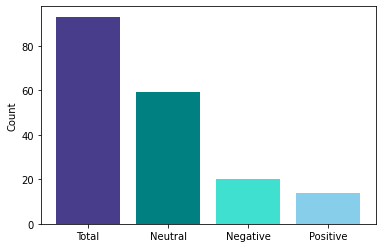

In [39]:
keys = sm_category_count.keys()
values = sm_category_count.values()
plt.bar(keys, values, color=['darkslateblue', 'teal', 'turquoise', 'skyblue'])
plt.ylabel('Count')

In [19]:
# Function to count impact of positives and negatives and output overall sentiment value
def feature_creation(counts):
    positive_counts = []
    neg_counts = []
    for key, value in topics_index_value.items():
        if value==1:
            positive_counts.append(counts[int(key)])
        elif value==-1:
            neg_counts.append(counts[int(key)])
    
    X = (sum(positive_counts)+sum(neg_counts))
    
    if X==0:
        return np.NaN
    else:
        return sum(positive_counts)/X

In [20]:
topics_count_df['BTC_score'] = topics_count_df['BTC_counts'].apply(feature_creation)
topics_count_df['twitter_score'] = topics_count_df['twitter_counts'].apply(feature_creation)
topics_count_df['reddit_score'] = topics_count_df['reddit_counts'].apply(feature_creation)

In [21]:
topics_count_df[['BTC_score','twitter_score','reddit_score']].head()

,BTC_score,twitter_score,reddit_score
datetime,,,
2018-02-01,0.496911,0.569701,0.429601
2018-02-02,0.479340,0.552322,0.430662
2018-02-03,0.495011,0.585380,0.453424
2018-02-04,0.499830,0.554089,0.444839
2018-02-05,0.469328,0.529476,0.438090


In [22]:
# Export to csv for rest of the team
# topics_count_df.to_csv('../data/augmento_scores_df.csv')

#### Visualizing Score Fluctuations

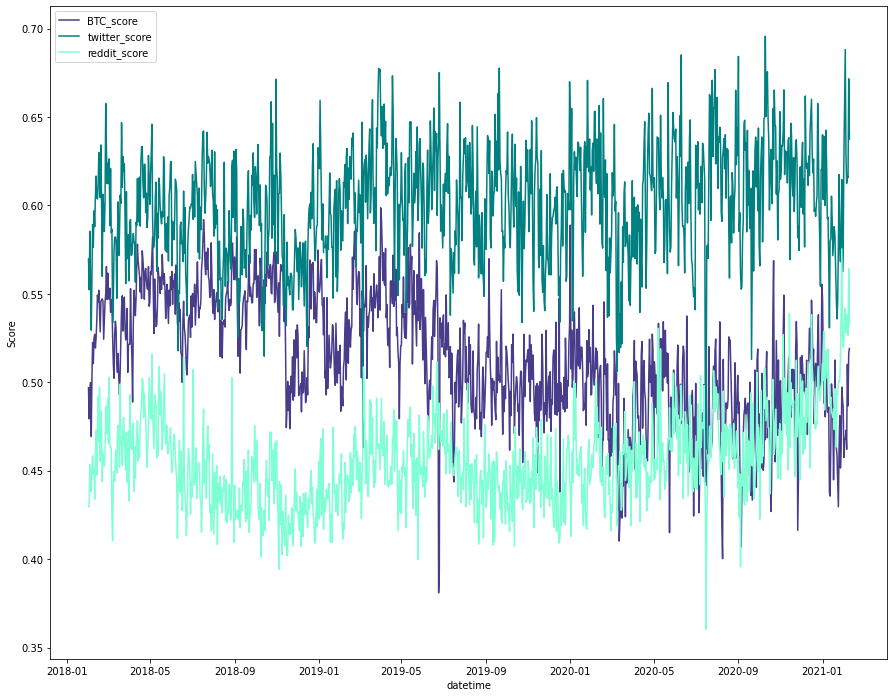

In [38]:
figure = plt.figure(figsize=(15,12))
topics_count_df['BTC_score'].plot(c = 'darkslateblue')
topics_count_df['twitter_score'].plot(c = 'teal')
topics_count_df['reddit_score'].plot(c ='aquamarine')
plt.ylabel('Score')
plt.legend()

In [ ]:
# Look into distribution of counts per category

### MAE and Accuracy prediction plotting

In [3]:
import pandas as pd
no_score = pd.read_csv('../data/predictions_no_score.csv')
one_score = pd.read_csv('../data/predictions_fear_greed_score.csv')
all_score = pd.read_csv('../data/predictions_all_scores_best.csv')

In [4]:
def metrics(pred_df):
        accuracy = pred_df['correct_pred'].sum()/len(pred_df['correct_pred'])
        MAE = pred_df['mae'].mean()
        return accuracy, MAE

In [5]:
metrics(no_score)

(0.4983922829581994, 1096.1259608467442)

In [6]:
metrics(one_score)

(0.5353697749196141, 974.9540944091292)

In [7]:
metrics(all_score)

(0.5767284991568297, 819.8181101119519)

In [9]:
accuracy = [metrics(no_score)[0], metrics(one_score)[0], metrics(all_score)[0]]
mae = [metrics(no_score)[1], metrics(one_score)[1], metrics(all_score)[1]]
accuracy

[0.4983922829581994, 0.5353697749196141, 0.5767284991568297]

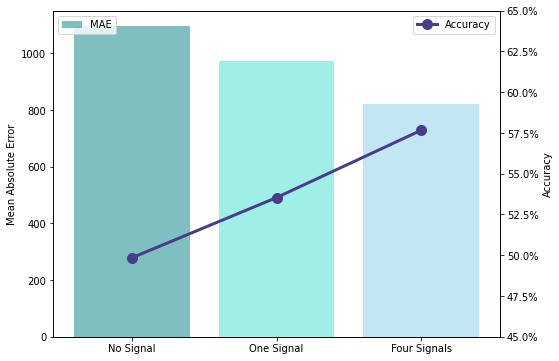

In [41]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax1 = plt.subplots(figsize=(8,6))
ax1.set(ylabel='Mean Absolute Error')
ax1.bar(x = ['No Signal', 'One Signal', 'Four Signals'], height = mae, label='MAE', alpha = 0.5, color=['teal', 'turquoise', 'skyblue'])
ax2=ax1.twinx()
ax2.set(ylabel='Accuracy')
ax2.plot(['No Signal', 'One Signal', 'Four Signals'],accuracy, label='Accuracy', marker = 'o', markersize = 10, lw = 3, c = 'darkslateblue')
ax2.set_ylim(0.45,0.65)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax1.legend(loc=2)
ax2.legend()
plt.show()

## Combining Indexes and Prices (inner)

In [2]:
btc_data = pd.read_csv('../data/bitcoinprice_fixed.csv')

btc_data.columns=['timestamp','btc_price']

btc_data = btc_data.set_index('timestamp')

In [3]:
btc_data.head()

,btc_price
timestamp,
2018-01-01,13412.4400
2018-01-02,14740.7563
2018-01-03,15134.6513
2018-01-04,15155.2263
2018-01-05,16937.1738


In [35]:
fear_greed_data = pd.read_csv('../data/Fear_Greed_df.csv')
fear_greed_data = fear_greed_data.set_index('timestamp')

In [36]:
fear_greed_data.head()

,Fear&Greed
timestamp,
2021-03-03,78
2021-03-02,78
2021-03-01,38
2021-02-28,55
2021-02-27,56


In [37]:
augmento_data = pd.read_csv('../data/augmento_scores_df.csv')
augmento_data = augmento_data.rename(columns={"datetime": "timestamp"})
augmento_data = augmento_data.set_index('timestamp')
augmento_data.head()

,BTC_counts,twitter_counts,reddit_counts,BTC_score,twitter_score,reddit_score
timestamp,,,,,,
2018-02-01,"[30, 199, 207, 200, 53, 150, 20, 1, 2, 54, 24,...","[19, 35, 53, 179, 26, 44, 22, 5, 22, 83, 22, 4...","[25, 142, 143, 330, 60, 90, 107, 2, 12, 90, 32...",0.496911,0.569701,0.429601
2018-02-02,"[40, 217, 142, 275, 123, 126, 31, 2, 5, 93, 15...","[30, 42, 51, 173, 43, 29, 28, 12, 21, 144, 35,...","[23, 143, 118, 343, 92, 72, 122, 12, 10, 142, ...",0.479340,0.552322,0.430662
2018-02-03,"[25, 181, 145, 177, 47, 96, 14, 3, 4, 53, 17, ...","[11, 20, 91, 91, 12, 70, 10, 16, 20, 48, 25, 3...","[24, 72, 101, 128, 37, 66, 52, 8, 4, 40, 24, 5...",0.495011,0.585380,0.453424
2018-02-04,"[25, 159, 114, 151, 36, 88, 19, 1, 1, 23, 7, 3...","[13, 22, 86, 87, 12, 45, 21, 4, 19, 46, 28, 36...","[11, 73, 116, 121, 45, 64, 48, 4, 5, 52, 14, 3...",0.499830,0.554089,0.444839
2018-02-05,"[29, 202, 174, 231, 56, 97, 29, 2, 6, 81, 18, ...","[14, 35, 180, 155, 21, 35, 39, 3, 16, 143, 23,...","[26, 154, 215, 302, 89, 99, 97, 12, 14, 163, 5...",0.469328,0.529476,0.438090


In [44]:
complete_df = btc_data.join(fear_greed_data,on='timestamp',how='inner').join(augmento_data,on='timestamp',how='inner')

In [45]:
complete_df

,btc_price,Fear&Greed,BTC_counts,twitter_counts,reddit_counts,BTC_score,twitter_score,reddit_score
timestamp,,,,,,,,
2018-02-01,9052.5763,30,"[30, 199, 207, 200, 53, 150, 20, 1, 2, 54, 24,...","[19, 35, 53, 179, 26, 44, 22, 5, 22, 83, 22, 4...","[25, 142, 143, 330, 60, 90, 107, 2, 12, 90, 32...",0.496911,0.569701,0.429601
2018-02-02,8827.6300,15,"[40, 217, 142, 275, 123, 126, 31, 2, 5, 93, 15...","[30, 42, 51, 173, 43, 29, 28, 12, 21, 144, 35,...","[23, 143, 118, 343, 92, 72, 122, 12, 10, 142, ...",0.479340,0.552322,0.430662
2018-02-03,9224.3913,40,"[25, 181, 145, 177, 47, 96, 14, 3, 4, 53, 17, ...","[11, 20, 91, 91, 12, 70, 10, 16, 20, 48, 25, 3...","[24, 72, 101, 128, 37, 66, 52, 8, 4, 40, 24, 5...",0.495011,0.585380,0.453424
2018-02-04,8186.6488,24,"[25, 159, 114, 151, 36, 88, 19, 1, 1, 23, 7, 3...","[13, 22, 86, 87, 12, 45, 21, 4, 19, 46, 28, 36...","[11, 73, 116, 121, 45, 64, 48, 4, 5, 52, 14, 3...",0.499830,0.554089,0.444839
2018-02-05,6914.2600,11,"[29, 202, 174, 231, 56, 97, 29, 2, 6, 81, 18, ...","[14, 35, 180, 155, 21, 35, 39, 3, 16, 143, 23,...","[26, 154, 215, 302, 89, 99, 97, 12, 14, 163, 5...",0.469328,0.529476,0.438090
...,...,...,...,...,...,...,...,...
2021-01-27,30425.3933,78,"[6, 24, 36, 41, 16, 45, 7, 2, 3, 10, 21, 9, 14...","[6, 8, 50, 71, 24, 16, 17, 21, 5, 29, 60, 20, ...","[14, 57, 74, 138, 45, 48, 49, 15, 12, 16, 77, ...",0.451524,0.568092,0.512576
2021-01-28,33420.0450,55,"[4, 39, 32, 66, 17, 44, 6, 4, 3, 6, 19, 10, 16...","[0, 15, 44, 74, 41, 61, 18, 10, 9, 27, 64, 8, ...","[14, 69, 130, 216, 62, 117, 84, 11, 20, 16, 10...",0.461012,0.588805,0.541803
2021-01-29,34264.0100,77,"[1, 29, 24, 46, 38, 23, 6, 2, 2, 3, 34, 19, 19...","[4, 23, 37, 111, 35, 43, 39, 8, 16, 23, 72, 36...","[18, 201, 338, 758, 213, 148, 275, 6, 14, 31, ...",0.497264,0.614617,0.575444


## Time Series Analysis

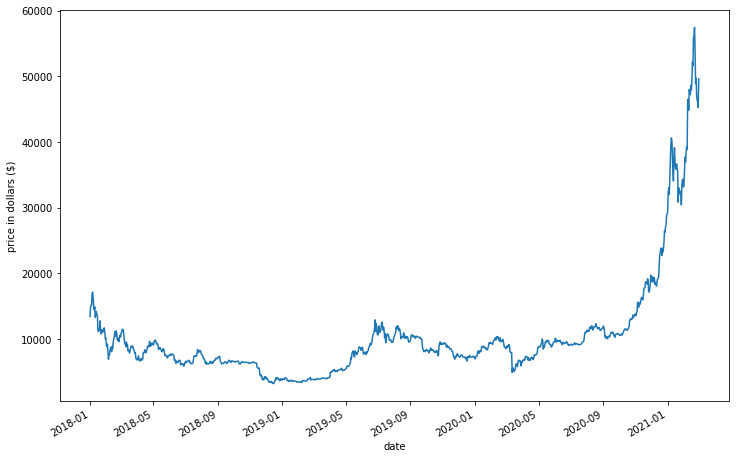

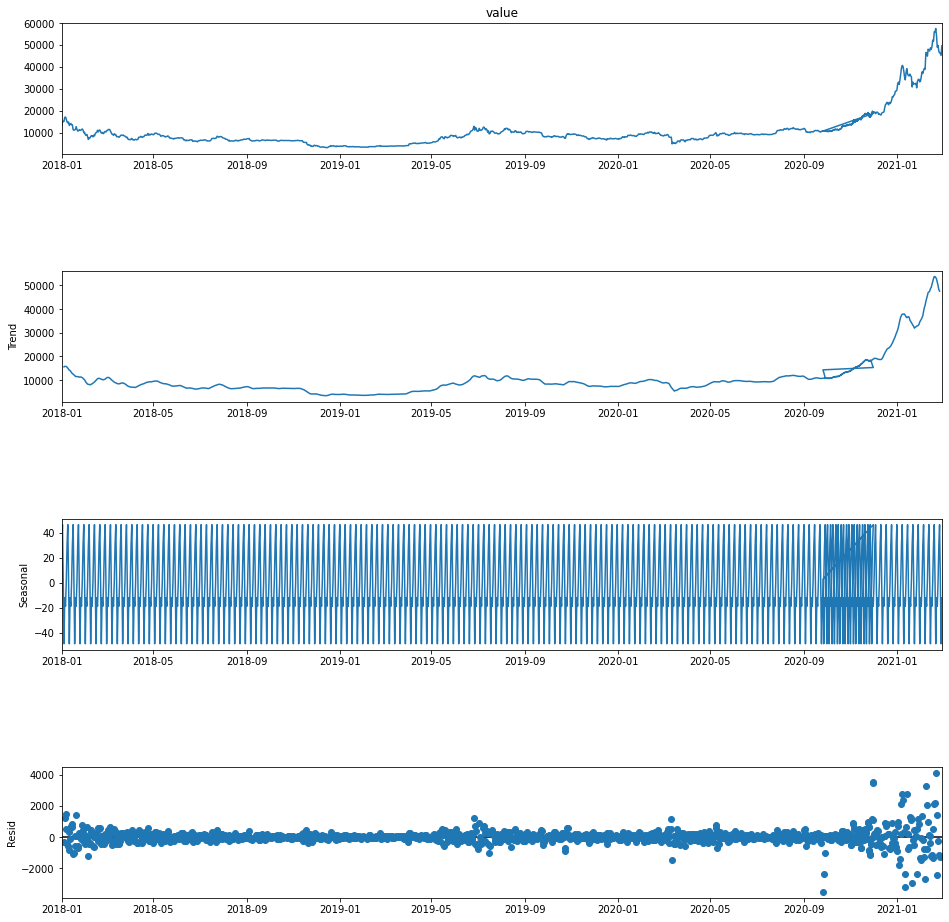

In [106]:
df = pd.read_csv("../data/bitcoinprice_api.csv")
df.columns = ["date", "value"]
df["date"] = pd.to_datetime(df["date"], infer_datetime_format = True)
df.reset_index()
df = df.set_index(df["date"])
df = df.drop("date", axis=1)
plt.figure(figsize=(12,8))
df["value"].plot()
plt.xlabel("date")
plt.ylabel("price in dollars ($)")
plt.show()
from statsmodels.tsa.seasonal import seasonal_decompose
decomp_add = seasonal_decompose(df["value"], model="additive",period=7)
decomp_mult = seasonal_decompose(df["value"], model="multiplicative",period=7)
fig = decomp_add.plot()
fig.set_figheight(15)
fig.set_figwidth(15)

In [129]:
# This proves a lack of seasonality in our data